In [1]:
import pypsa

In [2]:
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [3]:
n = pypsa.Network("results/testMultiDigestables/postnetworks/elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc")

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:769: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=df.index | columns, fill_value=default)
/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/pypsa/io.py:771: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  pnl[attr] = pnl[attr].reindex(columns=(pnl[attr].columns | columns))
INFO:pypsa.io:Imported network elec_s_37_lvopt__Co2L0p05-97H-T-H-B-I-bioT-hvdc_2030.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


INFO:numexpr.utils:NumExpr defaulting to 6 threads.


(<matplotlib.collections.PatchCollection at 0x7f8bbdd26850>,
 <matplotlib.collections.LineCollection at 0x7f8bbcb739a0>)

/home/millinger/miniconda3/envs/pypsa-eur/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:387: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  return matplotlib.axes.Axes.draw(self, renderer=renderer,


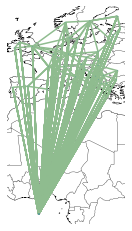

In [4]:
n.plot()

In [5]:
n.objective / 1e9 #billion EUR p.a.

618.182825728791

In [6]:
import cartopy.crs as ccrs

In [7]:
loading = (n.links_t.p0.abs().mean().sort_index() / (n.links.p_nom_opt*n.links.p_max_pu).sort_index()).fillna(0.)
# PlateCarree, Mercator, Orthographic\n",
notdc_b = n.links.index[n.links.carrier != "DC"]                        
loading[notdc_b] = 0

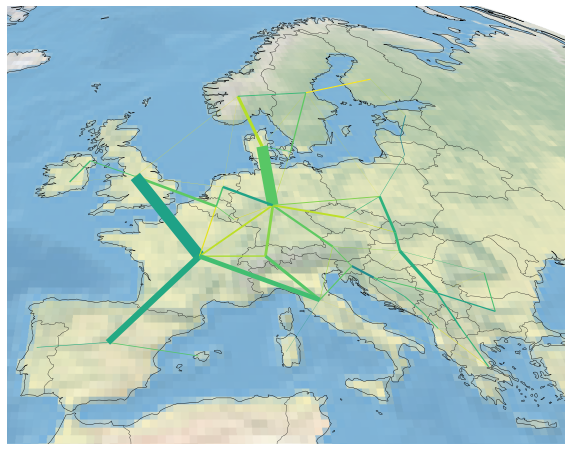

In [8]:
fig,ax = plt.subplots(
    figsize=(10,10),
    subplot_kw={"projection": ccrs.Orthographic()},
    )

dc_b = n.links.index[n.links.carrier == "DC"]
notdc_b = n.links.index[n.links.carrier != "DC"]
n.links.loc[dc_b, "temp"] = n.links.p_nom_opt
n.links.loc[notdc_b, "temp"] = 0
#n.links.temp.fillna(0.01)
    
n.plot(ax=ax,
          bus_colors='gray',
          branch_components=["Link"],
          link_widths=n.links.temp / 5e3,
          link_colors=loading,
          link_cmap=plt.cm.viridis,
          color_geomap=True,
          bus_sizes=0)
#ax.axis('on');\n",
#ax.set(xlim=(0, 40), ylim=(-50, 50))\n",
#ax.xlim\n",
#ax.set_extent([-1058286, 2449341, 3700000, 6067277], crs=ccrs.Orthographic())\n",
ax.set_extent([-1058286, 2949341, 4000000, 12067277], crs=ccrs.Mercator())

ax.stock_img()
ax.get_extent()
fig.savefig(fname="grid.png")

In [9]:
n.generators.p_nom_opt

name
AL0 0 offwind-ac    1.667361e-02
AL0 0 onwind        1.735160e-02
AL0 0 solar         1.786885e+04
AT0 0 onwind        1.938398e-02
AT0 0 ror           4.478505e+03
                        ...     
SK0 0 onwind        2.775438e-02
SK0 0 ror           6.413300e+02
SK0 0 solar         3.546992e-01
EU gas              6.274546e+05
EU oil              1.482311e+06
Name: p_nom_opt, Length: 152, dtype: float64

In [10]:
n.links.loc[n.links.carrier=='Fischer-Tropsch'].p_nom_opt.sort_values(ascending=False).head(50)

name
GB4 0 Fischer-Tropsch      0.019378
IE4 0 Fischer-Tropsch      0.017707
GB5 0 Fischer-Tropsch      0.017208
LU0 0 Fischer-Tropsch      0.014293
NO3 0 Fischer-Tropsch      0.014180
BE0 0 Fischer-Tropsch      0.014089
NL0 0 Fischer-Tropsch      0.014083
SE3 0 Fischer-Tropsch      0.014071
DE0 0 Fischer-Tropsch      0.014051
FI3 0 Fischer-Tropsch      0.013913
CH0 0 Fischer-Tropsch      0.013899
FR0 0 Fischer-Tropsch      0.013852
AT0 0 Fischer-Tropsch      0.013844
DK0 0 Fischer-Tropsch      0.013794
CZ0 0 Fischer-Tropsch      0.013789
DK3 0 Fischer-Tropsch      0.013748
SK0 0 Fischer-Tropsch      0.013725
HU0 0 Fischer-Tropsch      0.013651
PL0 0 Fischer-Tropsch      0.013631
HR0 0 Fischer-Tropsch      0.013618
SI0 0 Fischer-Tropsch      0.013588
RS0 0 Fischer-Tropsch      0.013133
BA0 0 Fischer-Tropsch      0.013019
AL0 0 Fischer-Tropsch      0.012988
ME0 0 Fischer-Tropsch      0.012902
RO0 0 Fischer-Tropsch      0.012894
MK0 0 Fischer-Tropsch      0.012886
LT6 0 Fischer-Tropsch  

In [11]:
n.links.groupby("carrier").p_nom_opt.sum() / 1e3 #GW

carrier
BEV charger                                           704.126759
BioSNG                                                  0.000026
DAC                                                     0.892500
DC                                                    478.528065
Fischer-Tropsch                                         0.000523
H2 Electrolysis                                        11.610445
H2 Fuel Cell                                            0.000377
H2 pipeline                                             4.974103
OCGT                                                  133.150006
SMR                                                     0.000586
SMR CC                                                 72.503467
Sabatier                                                0.000241
V2G                                                   704.126759
battery charger                                         0.004692
battery discharger                                      0.004789
co2 vent         

In [12]:
n.stores_t.e.filter(regex='co2 stored') /1e6#.sum() / 1e6 #MtCO2

name,co2 stored
name,
2013-01-01 00:00:00,9.861237
2013-01-05 01:00:00,20.288312
2013-01-09 02:00:00,30.715259
2013-01-13 03:00:00,41.058640
2013-01-17 04:00:00,51.488579
...,...
2013-12-14 14:00:00,771.534150
2013-12-18 15:00:00,781.438759
2013-12-22 16:00:00,790.735896


In [13]:
n.stores_t.p.filter(regex='co2 stored') #tCO2

name,co2 stored
name,
2013-01-01 00:00:00,-116106.675378
2013-01-05 01:00:00,-123206.288568
2013-01-09 02:00:00,-123204.403935
2013-01-13 03:00:00,-122070.262162
2013-01-17 04:00:00,-123135.450397
...,...
2013-12-14 14:00:00,-121341.662732
2013-12-18 15:00:00,-115975.589395
2013-12-22 16:00:00,-110664.726404


In [14]:
n.stores.e_nom_opt

name
co2 atmosphere           2.299357e+08
co2 stored               9.414879e+08
EU gas Store             5.569847e+08
DE0 0 H2 Store           1.838847e+04
DK0 0 H2 Store           1.944575e+03
                             ...     
RO0 0 battery storage    2.709375e+04
RS0 0 battery storage    2.028825e+04
SE3 0 battery storage    2.750344e+04
SI0 0 battery storage    6.984375e+03
SK0 0 battery storage    1.093313e+04
Name: e_nom_opt, Length: 271, dtype: float64

In [13]:
n.links.p_nom_opt.filter(regex='DE.*lowT')

name
DE0 0 solid biomass for lowT industry           0.017114
DE0 0 solid biomass for lowT industry CC     2493.803561
DE0 0 methane for lowT industry                 0.012879
DE0 0 methane for lowT industry CC          19677.012236
DE0 0 H2 for lowT industry                      0.008474
Name: p_nom_opt, dtype: float64

In [16]:
n.links.loc[n.links.carrier=='biogas to gas'].p_nom_opt.sort_values(ascending=False).head(50)

name
FR0 0 biogas to gas    0.023289
PL0 0 biogas to gas    0.021980
HU0 0 biogas to gas    0.021910
ES0 0 biogas to gas    0.021882
DE0 0 biogas to gas    0.021790
IT0 0 biogas to gas    0.021745
BE0 0 biogas to gas    0.021675
GB5 0 biogas to gas    0.021655
NL0 0 biogas to gas    0.021654
CZ0 0 biogas to gas    0.021586
MK0 0 biogas to gas    0.021260
DK0 0 biogas to gas    0.021200
ME0 0 biogas to gas    0.021097
RO0 0 biogas to gas    0.021052
RS0 0 biogas to gas    0.021052
EE6 0 biogas to gas    0.021033
LV6 0 biogas to gas    0.021023
AT0 0 biogas to gas    0.021023
SK0 0 biogas to gas    0.021021
PT0 0 biogas to gas    0.021020
GR0 0 biogas to gas    0.021016
LT6 0 biogas to gas    0.021004
DK3 0 biogas to gas    0.020984
FI3 0 biogas to gas    0.020980
IT1 0 biogas to gas    0.020963
IE4 0 biogas to gas    0.020960
SE3 0 biogas to gas    0.020960
HR0 0 biogas to gas    0.020933
BG0 0 biogas to gas    0.020923
CH0 0 biogas to gas    0.020813
NO3 0 biogas to gas    0.020738
ES2

In [15]:
n.links.p_nom_opt.filter(regex='digestable').head(50)

name
AL0 0 ManureSlurry digestable biomass          0.000921
AT0 0 ManureSlurry digestable biomass          0.001015
BA0 0 ManureSlurry digestable biomass          0.000931
BE0 0 ManureSlurry digestable biomass          0.001023
BG0 0 ManureSlurry digestable biomass          0.001025
CH0 0 ManureSlurry digestable biomass          0.001024
CZ0 0 ManureSlurry digestable biomass          0.001030
DE0 0 ManureSlurry digestable biomass          0.001055
DK0 0 ManureSlurry digestable biomass          0.001034
DK3 0 ManureSlurry digestable biomass          0.001002
EE6 0 ManureSlurry digestable biomass          0.001011
ES0 0 ManureSlurry digestable biomass          0.001057
ES2 0 ManureSlurry digestable biomass          0.000934
FI3 0 ManureSlurry digestable biomass          0.001024
FR0 0 ManureSlurry digestable biomass          0.000994
GB4 0 ManureSlurry digestable biomass          0.001017
GB5 0 ManureSlurry digestable biomass          0.001057
GR0 0 ManureSlurry digestable biomass      